Yield Curves and Interest Rate Derivatives Model

Yield Curve

[*********************100%%**********************]  2 of 2 completed

Required columns are missing in the data DataFrame.


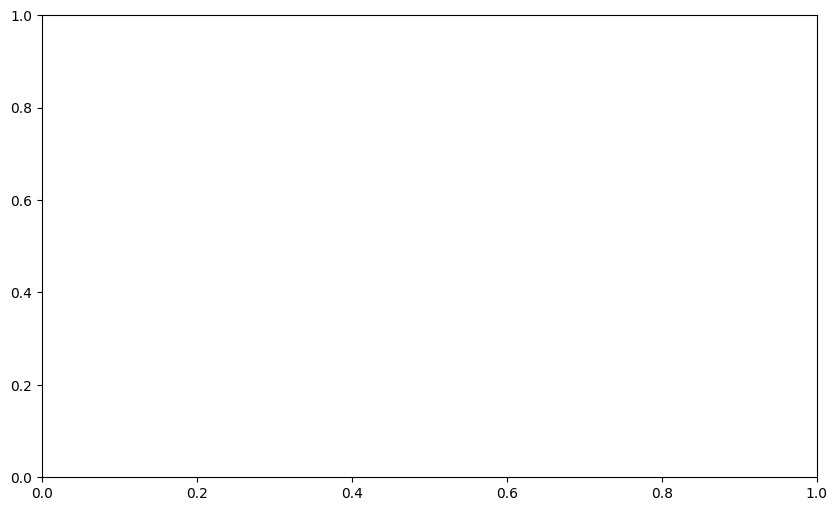

In [2]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns
# Download data
tickers = ['GS', 'NVDA']
data = yf.download(tickers, start='2021-01-01', end='2024-10-31', period='1d')
# Plot data
fig, ax = plt.subplots(figsize=(10, 6))
if "Date" in data.columns and "Close" in data.columns and "Ticker" in data.columns:
    sns.lineplot(data=data, x="Date", y="Close", hue="Ticker") 
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show() 
else:
    print("Required columns are missing in the data DataFrame.")

In [5]:
import numpy as np
from scipy.optimize import minimize
def nelson_siegel(x, maturities, yields):
    b0, b1, b2, tau = x
    model_yields = b0 + b1 * ((1 - np.exp(-maturities / tau)) / (maturities / tau)) + b2 * (((1 - np.exp(-maturities / tau)) / (maturities / tau)) - np.exp(-maturities / tau))
    return np.mean((model_yields - yields) ** 2)

def fit_yield_curve(maturities, yields):
    # Initial parameters for optimization 
    x0 = [0.05, -0.01, -0.02, 5.0] 
    result = minimize(nelson_siegel, x0, args=(maturities, yields)) 
    return result.x

# Generate sample data
maturities = np.array([1, 2, 3, 4, 5, 7, 10, 20, 30])
yields = np.array([0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.15])
# Fit yield curve using Nelson-Siegel model
parameters = fit_yield_curve(maturities, yields)

/var/folders/60/3nkvzscs6tbfw07943dj271h0000gn/T/ipykernel_12143/1243415207.py:3: RuntimeWarning: invalid value encountered in divide
  model_yields = parameters[0] + parameters[1] * ((1 - np.exp(-model_maturities / parameters[3])) / (model_maturities / parameters[3])) + parameters[2] * (((1 - np.exp(-model_maturities / parameters[3])) / (model_maturities / parameters[3])) - np.exp(-model_maturities / parameters[3]))


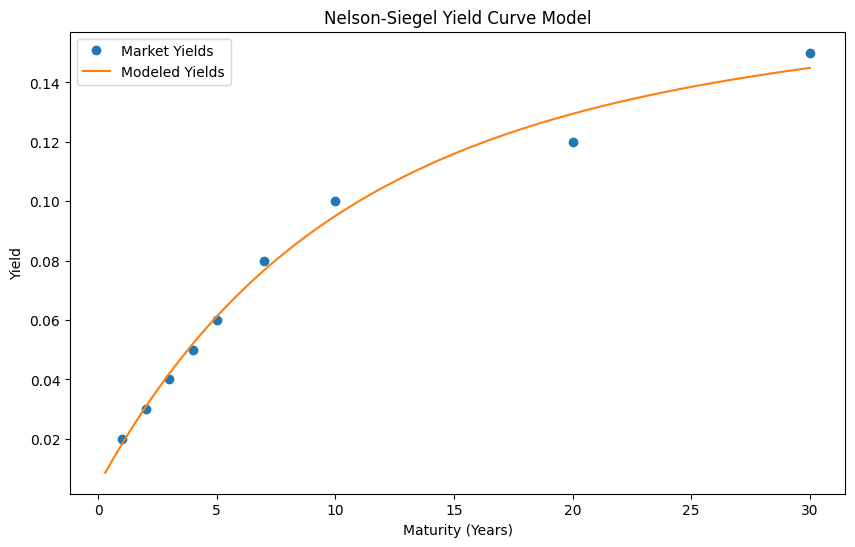

In [6]:
# Calculate modeled yield curve
model_maturities = np.linspace(0, 30, 100)
model_yields = parameters[0] + parameters[1] * ((1 - np.exp(-model_maturities / parameters[3])) / (model_maturities / parameters[3])) + parameters[2] * (((1 - np.exp(-model_maturities / parameters[3])) / (model_maturities / parameters[3])) - np.exp(-model_maturities / parameters[3]))

# Plot yield curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(maturities, yields, 'o', label='Market Yields') 
ax.plot(model_maturities, model_yields, label='Modeled Yields') 
ax.set_xlabel('Maturity (Years)')
ax.set_ylabel('Yield')
ax.set_title('Nelson-Siegel Yield Curve Model')
ax.legend()
plt.show()

In [12]:
 # Sample market data
maturities = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Bond maturities (in years)
bond_prices = [97.5, 95.2, 92.8, 90.5, 88.3, 86.2, 84.1, 82.2, 80.4, 78.6] # Bond prices (in percent)

In [10]:
def yield_curve_func(yields, maturities, bond_prices):
    present_values = bond_prices / (1 + yields / 100) ** np.array(maturities) 
    return np.sum(present_values)

In [11]:
# Initial guess for yields
initial_guess = [1] * len(maturities) 
# Optimization function
opt_result = minimize(yield_curve_func, initial_guess, args=(maturities, bond_prices))
# Optimized yields
optimized_yields = opt_result.x

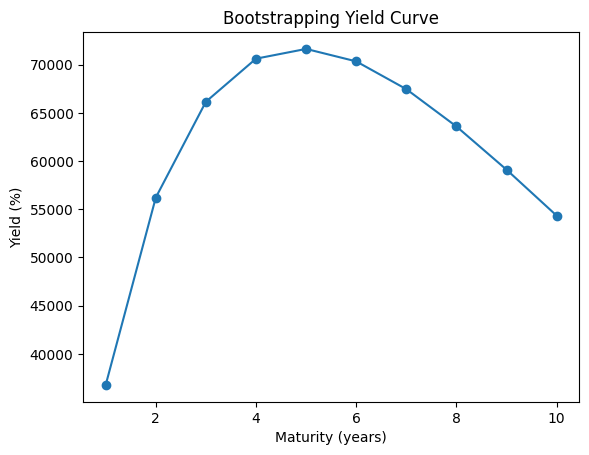

In [14]:
import matplotlib.pyplot as plt
# Plot the yield curve
plt.plot(maturities, optimized_yields, marker='o') 
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.title('Bootstrapping Yield Curve')
plt.show()

Interest Rate Derivatives

In [20]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def calculate_swap_price(fixed_rate, floating_rates, notional, periods):
    pv_floating = np.sum(floating_rates) * notional
    pv_fixed = fixed_rate * periods * notional
    return pv_fixed - pv_floating


def optimize_fixed_rate(floating_rates, notional, periods):
    fun = lambda fixed_rate: calculate_swap_price(fixed_rate, floating_rates, notional, periods) 
    result = minimize(fun, [0.05], bounds=[(0, None)])
    return result.x[0]

# Sample data
floating_rates = [0.02, 0.025, 0.03, 0.035] 
notional = 1000000
periods = 4

# Optimize fixed rate
fixed_rate = optimize_fixed_rate(floating_rates, notional, periods)
print(f"The optimized fixed rate for the interest rate swap is: {fixed_rate:.4f}%")




The optimized fixed rate for the interest rate swap is: 0.0000%


In [21]:
def swap_price_func(fixed_rate, floating_rates, notional, periods): 
    pv_floating = np.sum(floating_rates) * notional
    pv_fixed = fixed_rate * periods * notional
    return pv_fixed - pv_floating

In [22]:
# Optimization function
opt_result = minimize(swap_price_func, [0.05], args=(floating_rates, notional, periods))

# Optimized fixed rate
optimized_fixed_rate = opt_result.x[0]

In [23]:
# Initial guess for yields
initial_guess = [1] * len(maturities)

# Optimization function
opt_result = minimize(yield_curve_func, initial_guess, args=(maturities, bond_prices))

# Optimized yields
optimized_yields = opt_result.x

print(f"The optimized fixed rate for the interest rate swap is: {optimized_fixed_rate:.4f}%")

The optimized fixed rate for the interest rate swap is: -4429799770.8141%
